In [1]:
import pandas as pd 
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

In [2]:
dir = "/kaggle/input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        # img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i[-1]])

In [3]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [4]:
len(train_Y)

140000

In [5]:
len(train_X)

140000

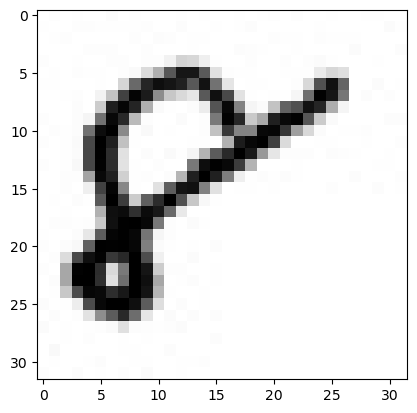

In [6]:
plt.imshow(train_X[50000]  , cmap=plt.cm.gray_r,interpolation="nearest")

In [7]:
train_Y[50000]

'8'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y,test_size=0.20 ,shuffle=True)

# knn

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
x_arr =np.array(X_train)

In [12]:
x_arr.shape

(112000, 32, 32)

In [13]:
xd =x_arr.reshape(112000,1024)

In [14]:
len(xd)

112000

In [15]:
knn.fit(xd,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_arr =np.array(X_test)

In [17]:
y_te = y_arr.reshape(28000,1024 )

In [18]:
predict =knn.predict(y_te)

In [19]:
predict[9]

'A'

In [20]:
accurcy = accuracy_score(y_test,predict)*100
print(str(accurcy)+" %")


86.17857142857143 %


**TENSORFLOW**

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Dense,Flatten,Dropout
from keras import Sequential

In [22]:
np.array(X_train).shape

(112000, 32, 32)

In [23]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(y_train)
val_Y = LB.fit_transform(y_test)

In [24]:
train_X = np.array(X_train)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [25]:
np.array(val_Y).shape

(28000, 35)

In [26]:
val_X = np.array(X_test)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [27]:
train_X.shape

(112000, 32, 32, 1)

In [28]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35,activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [30]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [31]:
history = model.fit(train_X , train_Y, epochs=10 , batch_size = 32 , validation_data = (val_X,val_Y) , verbose=1)

Epoch 1/10
3500/3500 [==============================] - 104s 29ms/step - loss: 0.6627 - accuracy: 0.7890 - val_loss: 0.3123 - val_accuracy: 0.8935
Epoch 2/10
3500/3500 [==============================] - 104s 30ms/step - loss: 0.3636 - accuracy: 0.8768 - val_loss: 0.2757 - val_accuracy: 0.9045
Epoch 3/10
3500/3500 [==============================] - 104s 30ms/step - loss: 0.3133 - accuracy: 0.8923 - val_loss: 0.2672 - val_accuracy: 0.9048
Epoch 4/10
3500/3500 [==============================] - 103s 30ms/step - loss: 0.2860 - accuracy: 0.9013 - val_loss: 0.2528 - val_accuracy: 0.9150
Epoch 5/10
3500/3500 [==============================] - 100s 29ms/step - loss: 0.2661 - accuracy: 0.9077 - val_loss: 0.2344 - val_accuracy: 0.9183
Epoch 6/10
3500/3500 [==============================] - 102s 29ms/step - loss: 0.2498 - accuracy: 0.9122 - val_loss: 0.2278 - val_accuracy: 0.9220
Epoch 7/10
3500/3500 [==============================] - 103s 30ms/step - loss: 0.2429 - accuracy: 0.9135 - val_loss: 0

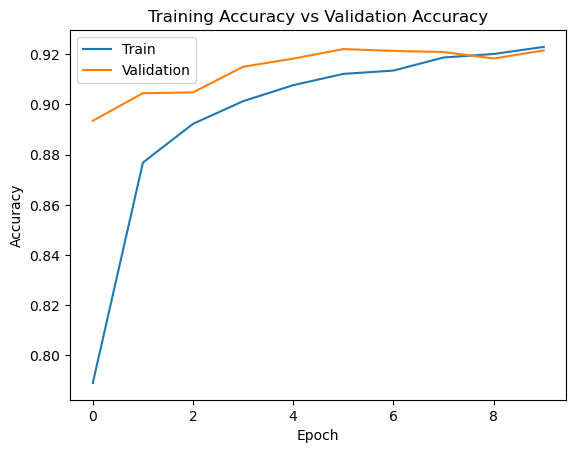

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

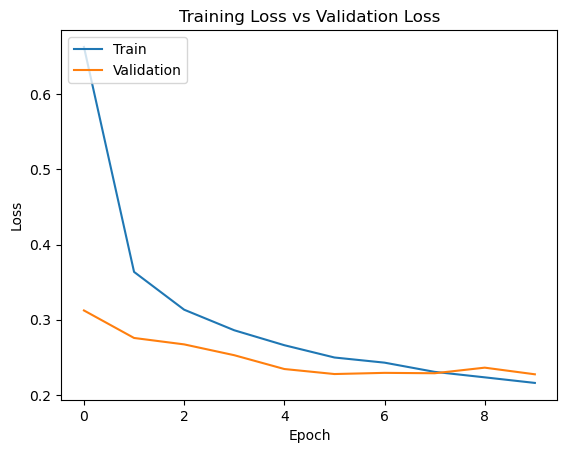

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
model.save("model4.h5")